In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [ ]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^


Correlation Matrix:
                                 ID  TargetID    DRUGID  DRUGTYPE  \
ID                         1.000000 -0.061251 -0.005976 -0.018522   
TargetID                  -0.061251  1.000000  0.030782  0.014317   
DRUGID                    -0.005976  0.030782  1.000000  0.027972   
DRUGTYPE                  -0.018522  0.014317  0.027972  1.000000   
Drug_high_status          -0.004847  0.045800  0.025747 -0.050062   
DRUGNAME                   0.021211  0.003616  0.006316 -0.013982   
PUBCHCID                  -0.003367  0.041957  0.012027  0.058558   
Disease_of_highest_status  0.021009  0.039632  0.008321  0.050552   
Drug_Status                0.019456  0.049686  0.010346 -0.029396   
UNIPROID                  -0.059096  0.124364 -0.042972 -0.008113   
TARGNAME                  -0.104442  0.078440 -0.031796 -0.001903   
GENENAME                  -0.055118  0.146675 -0.044514 -0.009234   
SYNONYMS                  -0.126725  0.018096 -0.028464 -0.003293   
FUNCTION      

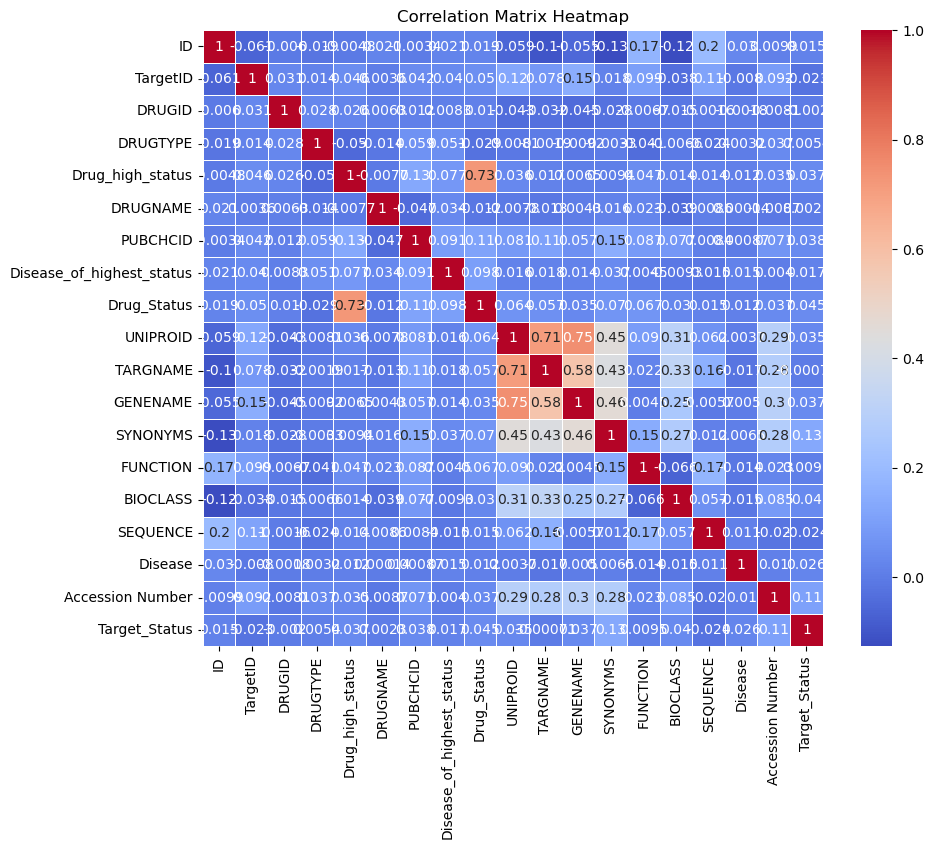

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your CSV file into a DataFrame
file_path = 'train.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Convert all categorical columns to numeric using Label Encoding
label_encoders = {}

for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le  # Store the encoder if you need to inverse transform later

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Optional: Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [4]:
!pip install pandas scikit-learn matplotlib


Explained Variance by Components: [0.16547863 0.09474326]


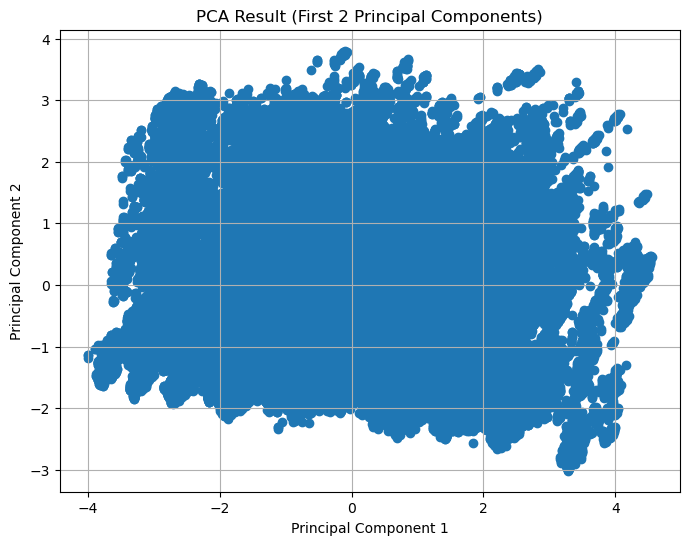

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'train.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Convert all categorical columns to numeric using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le  # Store the encoder if you need to inverse transform later

# Standardize the data (PCA performs better when data is scaled)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)  # Change n_components to the number of components you need
pca_result = pca.fit_transform(df_scaled)

# Display explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Components: {explained_variance}")

# Create a DataFrame for PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Optional: Visualize the PCA result (first two components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Result (First 2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Using RandomForest as an example
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load your CSV file into a DataFrame
file_path = 'train.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Separate the target (assuming the target column is 'status')
target_column = 'Target_Status'  # Replace with the actual target column name
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Convert all categorical columns to numeric using Label Encoding
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le  # Store encoders for possible reverse transformation

# Standardize the features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=5)  # Adjust n_components as needed
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a model (RandomForest in this case)
model = XGBClassifier( eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32], got ['Application submitted' 'Approved' 'Approved (orphan drug)'
 'BLA submitted' 'Clinical trial' 'Discontinued in Phase 1'
 'Discontinued in Phase 1/2' 'Discontinued in Phase 2'
 'Discontinued in Phase 2/3' 'Discontinued in Phase 2b'
 'Discontinued in Phase 3' 'Discontinued in Phase 4'
 'Discontinued in Preregistration' 'IND submitted' 'Investigative'
 'Patented' 'Phase 0' 'Phase 1' 'Phase 1/2' 'Phase 1/2a' 'Phase 1b'
 'Phase 1b/2a' 'Phase 2' 'Phase 2/3' 'Phase 2a' 'Phase 2b' 'Phase 3'
 'Phase 4' 'Preclinical' 'Preregistration' 'Registered' 'Terminated'
 'Withdrawn from market']

In [6]:
import zipfile

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Example usage:
zip_file_path = '/content/train.csv.zip'
output_directory = '/content/data'
unzip_file(zip_file_path, output_directory)


FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv.zip'

In [3]:
zip_file_path = '/content/test.csv.zip'  # Replace with your zip file path
output_directory = '/content/data'     # Replace with the desired extraction directory
unzip_file(zip_file_path, output_directory)

In [25]:
import pandas as pd
train=pd.read_csv('train.csv')
train.head()

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number,Target_Status
0,140736,T51115,D0L4YD,Small molecular drug,Approved,Solifenacin,154059,Overactive bladder,Approved,CAC1C_HUMAN,Voltage-gated calcium channel alpha Cav1.2 (CA...,CACNA1C,Voltage-gated calcium channel subunit alpha Ca...,Mediates influx of calcium ions into the cytop...,Voltage-gated ion channel,MVNENTRMYIPEENHQGSNYGSPRPAHANMNANAAAGLAPEHIPTP...,Genetic cardiac arrhythmia,Q13936,Terminated
1,133048,T60529,D03NMM,Small molecular drug,Investigative,AM-643,46843035,Dermatological disease,Investigative,PGH1_HUMAN,Prostaglandin G/H synthase 1 (COX-1),PTGS1,Prostaglandin-endoperoxide synthase 1; Prostag...,Converts arachidonate to prostaglandin H2 (PGH...,Paired donor oxygen oxidoreductase,MSRSLLLWFLLFLLLLPPLPVLLADPGAPTPVNPCCYYPCQHQGIC...,Rheumatoid arthritis,P23219,Approved
2,60493,T80975,D0T2ER,Small molecular drug,Phase 1,TAK-593,24767976,Solid tumour/cancer,Phase 1,VGFR2_HUMAN,Vascular endothelial growth factor receptor 2 ...,KDR,VEGFR2; VEGFR-2; VEGF-2 receptor; Protein-tyro...,Plays an essential role in the regulation of a...,Kinase,MQSKVLLAVALWLCVETRAASVGLPSVSLDLPRLSIQKDILTIKAN...,Renal cell carcinoma,P35968,Approved
3,169176,T92072,D07ESH,Small molecular drug,Discontinued in Phase 3,PF-1913539,176408,Alzheimer disease,Discontinued in Phase 3,AA1R_HUMAN,Adenosine A1 receptor (ADORA1),ADORA1,Adenosine receptor A1; A(1) adenosine receptor,The activity of this receptor is mediated by G...,GPCR rhodopsin,MPPSISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,Hyper-lipoproteinaemia,P30542,Phase 2
4,120183,T30082,D0Q0RC,Small molecular drug,Approved,Ethopropazine,3290,Parkinson disease,Approved,ACES_HUMAN,Acetylcholinesterase (AChE),ACHE,YT; N-ACHE; ARACHE,Role in neuronal apoptosis. Terminates signal ...,Carboxylic ester hydrolase,MRPPQCLLHTPSLASPLLLLLLWLLGGGVGAEGREDAELLVTVRGG...,Oesophageal/gastroduodenal disorder,P22303,Approved


In [5]:
!pip install xgboost scikit-learn pandas


In [26]:
import pandas as pd

# Load the data
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Display basic info and first few rows
print(data.info())
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134486 entries, 0 to 134485
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         134486 non-null  int64 
 1   TargetID                   134486 non-null  object
 2   DRUGID                     134486 non-null  object
 3   DRUGTYPE                   134486 non-null  object
 4   Drug_high_status           134486 non-null  object
 5   DRUGNAME                   134486 non-null  object
 6   PUBCHCID                   134486 non-null  int64 
 7   Disease_of_highest_status  134486 non-null  object
 8   Drug_Status                134486 non-null  object
 9   UNIPROID                   134486 non-null  object
 10  TARGNAME                   134486 non-null  object
 11  GENENAME                   134486 non-null  object
 12  SYNONYMS                   134486 non-null  object
 13  FUNCTION                   134486 non-null  

In [27]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


ID                           0
TargetID                     0
DRUGID                       0
DRUGTYPE                     0
Drug_high_status             0
DRUGNAME                     0
PUBCHCID                     0
Disease_of_highest_status    0
Drug_Status                  0
UNIPROID                     0
TARGNAME                     0
GENENAME                     0
SYNONYMS                     0
FUNCTION                     0
BIOCLASS                     0
SEQUENCE                     0
Disease                      0
Accession Number             0
Target_Status                0
dtype: int64


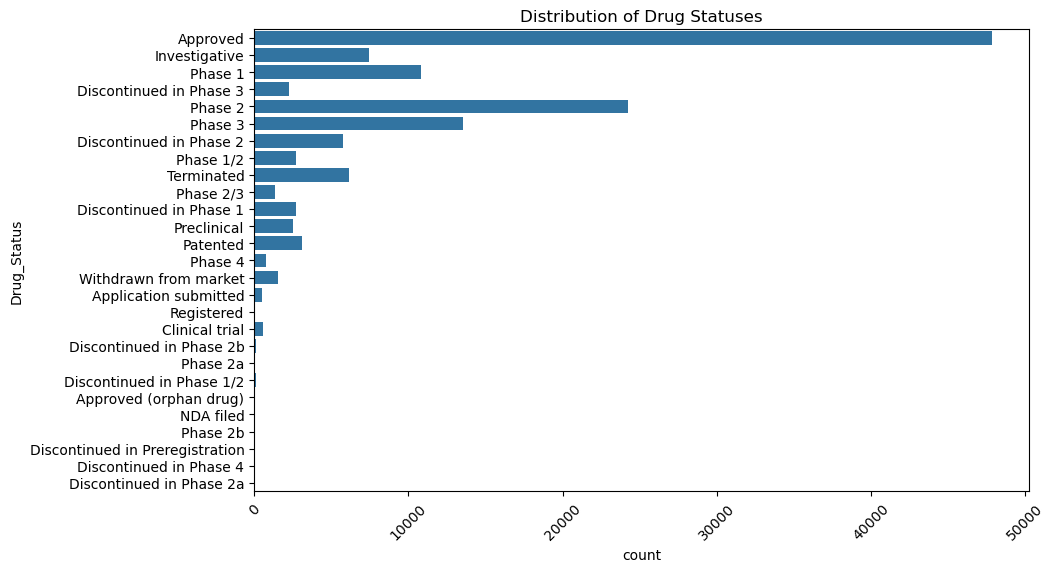

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of drug statuses
plt.figure(figsize=(10, 6))
sns.countplot(data['Drug_Status'])
plt.title('Distribution of Drug Statuses')
plt.xticks(rotation=45)
plt.show()



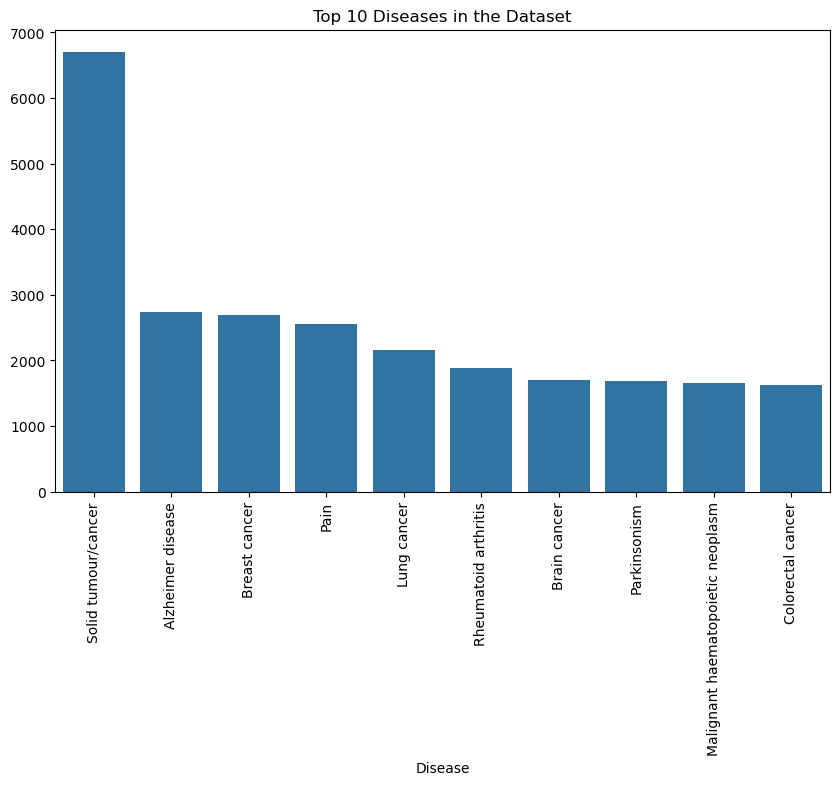

In [14]:
# Plot the top 10 diseases in the dataset
top_diseases = data['Disease'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_diseases.index, y=top_diseases.values)
plt.title('Top 10 Diseases in the Dataset')
plt.xticks(rotation=90)
plt.show()


In [29]:
print(data.dtypes)

# Find any columns with string/object data types that need to be encoded
string_columns = data.select_dtypes(include='object').columns
print(f"Columns with string values: {string_columns}")

ID                            int64
TargetID                     object
DRUGID                       object
DRUGTYPE                     object
Drug_high_status             object
DRUGNAME                     object
PUBCHCID                      int64
Disease_of_highest_status    object
Drug_Status                  object
UNIPROID                     object
TARGNAME                     object
GENENAME                     object
SYNONYMS                     object
FUNCTION                     object
BIOCLASS                     object
SEQUENCE                     object
Disease                      object
Accession Number             object
Target_Status                object
dtype: object
Columns with string values: Index(['TargetID', 'DRUGID', 'DRUGTYPE', 'Drug_high_status', 'DRUGNAME',
       'Disease_of_highest_status', 'Drug_Status', 'UNIPROID', 'TARGNAME',
       'GENENAME', 'SYNONYMS', 'FUNCTION', 'BIOCLASS', 'SEQUENCE', 'Disease',
       'Accession Number', 'Target_Status'],
   

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoders = {}
data_encoded= pd.DataFrame()

# Apply label encoding to all string columns
for col in string_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le


print(label_encoders['Target_Status'].classes_)
print(label_encoders['Target_Status'].inverse_transform([1]))
# Now, check if all columns are numeric
print(data_encoded.dtypes)




['Application submitted' 'Approved' 'Approved (orphan drug)'
 'BLA submitted' 'Clinical trial' 'Discontinued in Phase 1'
 'Discontinued in Phase 1/2' 'Discontinued in Phase 2'
 'Discontinued in Phase 2/3' 'Discontinued in Phase 2b'
 'Discontinued in Phase 3' 'Discontinued in Phase 4'
 'Discontinued in Preregistration' 'IND submitted' 'Investigative'
 'Patented' 'Phase 0' 'Phase 1' 'Phase 1/2' 'Phase 1/2a' 'Phase 1b'
 'Phase 1b/2a' 'Phase 2' 'Phase 2/3' 'Phase 2a' 'Phase 2b' 'Phase 3'
 'Phase 4' 'Preclinical' 'Preregistration' 'Registered' 'Terminated'
 'Withdrawn from market']
['Approved']
TargetID                     int64
DRUGID                       int64
DRUGTYPE                     int64
Drug_high_status             int64
DRUGNAME                     int64
Disease_of_highest_status    int64
Drug_Status                  int64
UNIPROID                     int64
TARGNAME                     int64
GENENAME                     int64
SYNONYMS                     int64
FUNCTION          

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle



df=train
columns_to_encode = df.columns


label_encoders = {}
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Saving the label encoders for future use
for column, le in label_encoders.items():
    with open(f'{column}_label_encoder.pkl', 'wb') as file:
        pickle.dump(le, file)

# Splitting data into features and target
X = df.drop('Target_Status', axis=1)  # Drop the target column
y = df['Target_Status']  # Target column

In [39]:
X

,ID,TargetID,DRUGID,DRUGTYPE,Drug_high_status,DRUGNAME,PUBCHCID,Disease_of_highest_status,Drug_Status,UNIPROID,TARGNAME,GENENAME,SYNONYMS,FUNCTION,BIOCLASS,SEQUENCE,Disease,Accession Number
0,98522,332,1645,4,0,2076,889,485,1,102,676,92,583,376,101,662,220,547
1,93131,402,394,4,11,76,2231,177,12,516,505,554,296,145,72,600,487,256
2,42495,547,2049,4,14,2125,2059,592,15,689,668,371,564,435,58,513,479,363
3,118452,636,760,4,8,1621,925,41,9,16,24,17,7,604,45,488,248,316
4,84226,210,1889,4,0,807,145,494,1,26,19,9,603,557,28,537,407,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134481,103525,393,721,4,17,1131,1779,402,17,214,211,211,347,510,58,538,116,58
134482,26621,441,2249,4,16,895,1296,384,16,279,240,279,191,480,45,190,328,630
134483,21273,314,467,4,0,1028,1249,130,21,467,428,471,645,490,45,183,367,356
134484,26735,270,1788,4,0,780,2127,395,15,360,511,530,314,426,58,26,334,104


        TARGNAME  BIOCLASS  Disease
134097       156        58       77
75050        228        58       31
71344        136        58      324
24651          0        45       62
112040        63        58      318
...          ...       ...      ...
110268        26        45      254
119879       654        58      368
103694       524        58       77
131932       447        58      452
121958       124        75      241

[107588 rows x 3 columns]
Top 5 Important Features:
     Feature  Importance
2   Disease    0.618017
0  TARGNAME    0.309881
1  BIOCLASS    0.072102


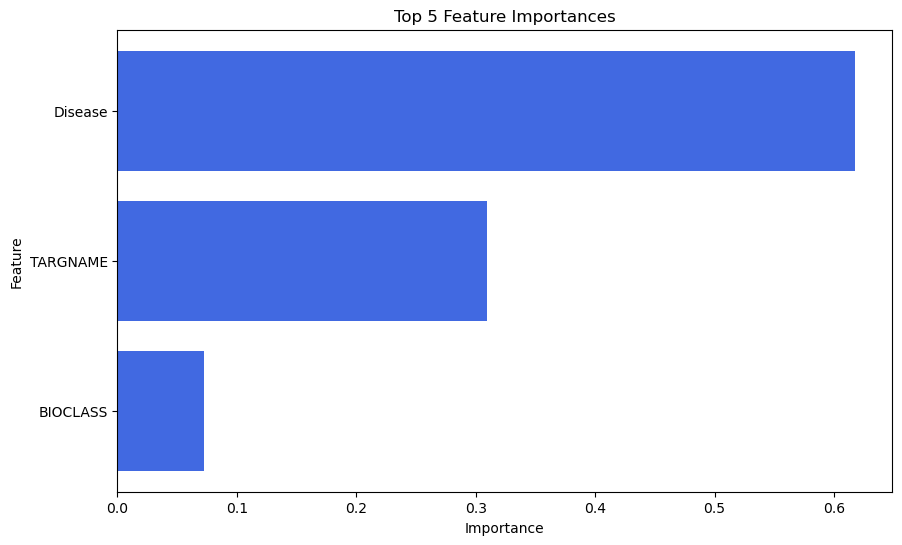

In [42]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train and y_train are already defined and cleaned

# Initialize and train the RandomForest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

print(X_train)
# Get feature importances from the trained model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 5 important features
top_5_features = feature_importance_df.head(5)

print("Top 5 Important Features:\n", top_5_features)

# Plotting the top 5 features (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


In [20]:
print(y_train.value_counts())

Target_Status
1     24863
22    23763
17    13533
26    12382
14     7308
18     4946
7      4638
31     4176
15     2427
10     2004
5      1904
28     1585
32     1212
23     1149
27      405
4       278
29      178
20      118
12      111
6       105
24      103
30       98
2        73
0        67
13       49
8        37
25       19
16       13
3        13
11       11
19        9
9         7
21        4
Name: count, dtype: int64


In [61]:
from sklearn.model_selection import train_test_split


# X = data_encoded.drop([ 'TargetID', 'DRUGID','DRUGTYPE','UNIPROID', 'DRUGNAME', 'Drug_Status','Target_Status'], axis=1)
X=data_encoded[['TARGNAME','Disease']]
y = data_encoded['Target_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
X_train

,TARGNAME,Disease
134097,156,77
75050,228,31
71344,136,324
24651,0,62
112040,63,318
...,...,...
110268,26,254
119879,654,368
103694,524,77
131932,447,452


In [60]:
y_train.value_counts()

Target_Status
1     24863
22    23763
17    13533
26    12382
14     7308
18     4946
7      4638
31     4176
15     2427
10     2004
5      1904
28     1585
32     1212
23     1149
27      405
4       278
29      178
20      118
12      111
6       105
24      103
30       98
2        73
0        67
13       49
8        37
25       19
16       13
3        13
11       11
19        9
9         7
21        4
Name: count, dtype: int64

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=100, 
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", random_search.best_params_)

# Make predictions
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  46.3s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  17.6s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  19.3s


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  36.8s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time= 1.1min
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.4s
[CV] END bootstrap=False, max_dept

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 666, in _valid

Best parameters found:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': True}
Accuracy: 0.9945720871440256
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00      6168
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00         1
           4       1.00      0.97      0.99        70
           5       1.00      1.00      1.00       475
           6       0.96      1.00      0.98        24
           7       1.00      1.00      1.00      1177
           8       1.00      0.82      0.90        11
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00       506
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        20
          13       1.00      1.00    

In [49]:
print(string_columns)

Index(['TargetID', 'DRUGID', 'DRUGTYPE', 'Drug_high_status', 'DRUGNAME',
       'Disease_of_highest_status', 'Drug_Status', 'UNIPROID', 'TARGNAME',
       'GENENAME', 'SYNONYMS', 'FUNCTION', 'BIOCLASS', 'SEQUENCE', 'Disease',
       'Accession Number', 'Target_Status'],
      dtype='object')


In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the test data
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)

# Step 2: Make sure the test data is processed in the same way as the training data

# List of categorical columns that were label encoded in the training set
categorical_columns =   string_columns
  # Remove 'Target_Status'
# categorical_columns = pd.Index(categorical_columns)  # Convert the list back to Index

# Apply label encoding to the test data using the encoders from training
for col in categorical_columns:
    if col in test_data.columns:
        le = label_encoders[col]
        # If there are unseen categories in the test set, we'll handle them by assigning -1
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Drop unnecessary columns like IDs and names that we won't use for predictions
X_test=test_data[['TARGNAME','Disease']]
print(X_test.dtypes)

TARGNAME    int64
Disease     int64
dtype: object


In [53]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the test data
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)

# Step 2: Make sure the test data is processed in the same way as the training data

# List of categorical columns that were label encoded in the training set
categorical_columns =   string_columns

for col in categorical_columns:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Drop unnecessary columns like IDs and names that we won't use for predictions
#'TargetID', 'DRUGID','DRUGTYPE','UNIPROID', 'DRUGNAME', 'Drug_Status','Target_Status'
#X_test = test_data.drop(['ID', 'TargetID', 'DRUGID','DRUGTYPE','UNIPROID', 'DRUGNAME', 'Drug_Status'], axis=1, errors='ignore')
X_test=test_data[['TARGNAME','Disease']]
print(X_test.dtypes)
# Step 3: Make predictions using the trained model
# Assuming the Random Forest model `rf_model` is already trained



TARGNAME    int64
Disease     int64
dtype: object


In [64]:
predictions = random_search.best_estimator_.predict(X_test)
print(label_encoders['Target_Status'].classes_)
# Step 4: Prepare the submission file
# Create a DataFrame with 'ID' and 'Prediction' columns
submission = pd.DataFrame({
    'ID': test_data['ID'],
    'Prediction': label_encoders['Target_Status'].inverse_transform(predictions)  # Inverse transform the predictions
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Submission file created at: submission.csv


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.6s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.3s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  36.2s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  19.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   6.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   6.

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  24.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.9s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  36.8s
[CV] END bootstrap=True, max_depth=30, min_samples_lea

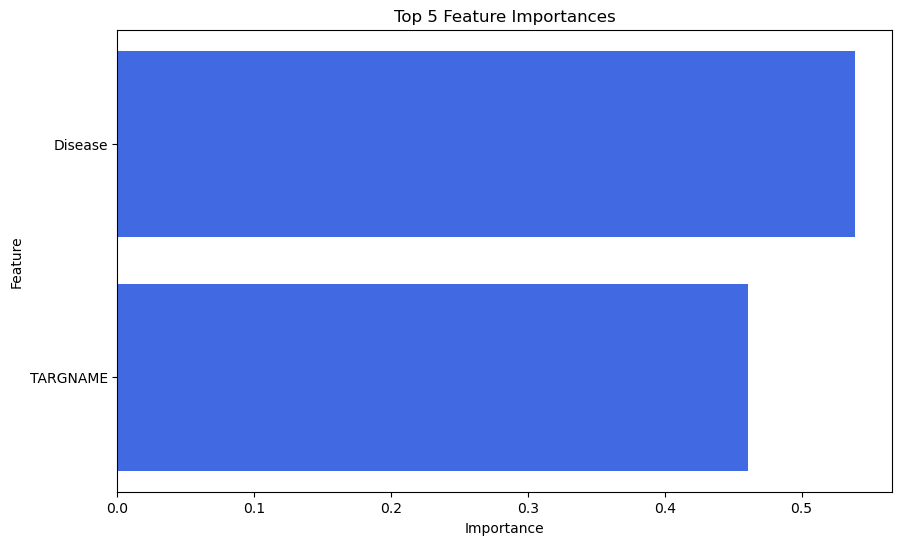

Submission file created at: submission_corrected.csv
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.5s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  12.1s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  37.1s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.7s
[CV] END bootstrap=False, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  37.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  23.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  18.5s
[CV

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing

# Assuming `data_encoded` is your original dataset
# Selecting features and target (already label encoded)
X = data_encoded[['TARGNAME', 'Disease']]
y = data_encoded['Target_Status']  # Already encoded Target_Status

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Initialization and Hyperparameter Tuning

# Initialize RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=50,  # Reduce n_iter for faster results
    cv=3, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Step 3: Get the best parameters and evaluate the model

print("Best parameters found: ", random_search.best_params_)

# Make predictions on test data
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 4: Feature Importance Analysis (optional)

importances = random_search.best_estimator_.feature_importances_

# Create a DataFrame for better visualization of important features
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance and get top 5
top_5_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

print("Top 5 Important Features:\n", top_5_features)

# Plotting the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()

# Step 5: Make Predictions on Test Data

# Assuming `test_data` is the new data (test.csv)
test_file_path = 'test.csv'
test_data = pd.read_csv(test_file_path)

# Ensure test data is processed the same way as training data
categorical_columns = ['TARGNAME', 'Disease']  # Columns used in training

# Transform categorical columns using the same label encoders (if necessary)
# Assuming 'label_encoders' is a dictionary of label encoders from training
for col in categorical_columns:
    if col in test_data.columns:
        le = label_encoders[col]  # Use label encoders saved from training
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Drop unnecessary columns and prepare test features
X_test_new = test_data[['TARGNAME', 'Disease']]

# Step 6: Make predictions on the new test data
predictions = random_search.best_estimator_.predict(X_test_new)

# Transform the predictions back to original labels
inverse_predictions = label_encoders['Target_Status'].inverse_transform(predictions)

# Step 7: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' column exists in test data
    'Prediction': inverse_predictions  # Use inverse-transformed predictions
})

# Save the submission file
submission_file_path = 'submission_corrected.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


In [77]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encoding categorical columns in the training data
categorical_columns = ['TARGNAME', 'Disease', 'Target_Status']  # Specify your categorical columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder to use it for test data

# Step 3: Splitting the data into features and target
X = train_data[['TARGNAME', 'Disease']]
y = train_data['Target_Status']

# Step 4: Train-test split (20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the ExtraTreesClassifier and define hyperparameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [10, 20, 30, None],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider for splits
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Initialize the ExtraTreesClassifier
et_model = ExtraTreesClassifier(random_state=42)

# Step 6: Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Step 7: Train the model with GridSearchCV
grid_search.fit(X, y)

# Step 8: Get the best parameters and train the final model
best_et_model = grid_search.best_estimator_

# Step 9: Evaluate the model on the test set
y_pred = best_et_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 10: Encoding the test data using the same encoders
for col in ['TARGNAME', 'Disease']:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 11: Prepare the test set for prediction
X_test_submission = test_data[['TARGNAME', 'Disease']]

# Step 12: Make predictions using the trained model
test_predictions = best_et_model.predict(X_test_submission)

# Step 13: Inverse transform the predictions to original labels
test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)

# Step 14: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  13.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   8.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.2s
[CV] END bootstrap=True, max_depth=10, max_feat

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   8.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   8.5s
[CV] END bootstrap=True, max_depth=10, max_fe

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy on test data: 0.9979
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00      6168
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00         1
           4       1.00      0.97      0.99        70
           5       1.00      1.00      1.00       475
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00      1177
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00       506
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        16
          14       1.00      1.00      1.00      1866
          15       1.00      1.00      1.00       628
          16       1.00    

In [74]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  14.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  15.2s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.6s
[CV] END bootstrap=False, max_depth=30, max_

In [80]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Encode categorical columns
categorical_columns = ['TARGNAME', 'Disease', 'Target_Status']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le

# Prepare features and target variable
X = train_data[['TARGNAME', 'Disease']]
y = train_data['Target_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Initialize BaggingClassifier with DecisionTreeClassifier as base estimator
bagging_model = BaggingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best parameters: {best_params}")
print(f"Accuracy of the best BaggingClassifier: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=50; total time=   2.3s
[CV] END bootstrap=True, max_features=0.5, max_samples=0.5, n_estimators=200; total time=   9.7s
[CV] END bootstrap=True, max_features=0.5, max_samples=1.0, n_estimators=100; total time=   6.7s
[CV] END bootstrap=True, max_features=0.7, max_samples=0.5, n_estimators=50; total time=   2.5s
[CV] END bootstrap=True, max_features=0.7, max_samples=0.5, n_estimators=200; total time=  10.0s
[CV] END bootstrap=True, max_features=0.7, max_samples=0.7, n_estimators=200; total time=  11.4s
[CV] END bootstrap=True, max_features=1.0, max_samples=0.5, n_estimators=100; total time=   8.3s
[CV] END bootstrap=True, max_features=1.0, max_samples=0.7, n_estimators=50; total time=   4.8s
[CV] END bootstrap=True, max_features=1.0, max_samples=0.7, n_estimators=200; total time=  18.6s


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Accuracy of the best BaggingClassifier: 0.9950
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00      9430
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00         2
           4       1.00      0.94      0.97        95
           5       1.00      1.00      1.00       736
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00      1761
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         5
          10       0.99      1.00      0.99       726
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        43
          13       1.00      1.00      1.00        19
          14       

Accuracy of RandomForestClassifier: 0.9983
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00      9296
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00         4
           4       1.00      0.94      0.97       104
           5       1.00      1.00      1.00       767
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00      1732
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00       785
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00        48
          13       1.00      1.00      1.00        15
          14       1.00      1.00      1.00      2764
          15       1.00      1.00      1.00       933
          16  

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.99505539 0.99609622 0.99572443 0.99561289 0.99572443]
Mean CV accuracy: 0.9956
Submission file created at: submission_random_forest.csv


In [110]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encoding categorical columns in the training data
categorical_columns = ['SYNONYMS', 'Disease', 'Target_Status']  # Specify your categorical columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder to use it for test data

# Step 3: Splitting the data into features and target
X = train_data[['SYNONYMS', 'Disease']]
y = train_data['Target_Status']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Step 5: Initialize RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)

# Step 6: Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],     
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Step 7: Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=1)  # Use n_jobs=1

# Step 8: Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Step 9: Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Step 10: Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 11: Perform K-Fold Cross-Validation
cross_val_scores = cross_val_score(best_model, X, y, cv=5)  # Using 5-fold cross-validation
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {cross_val_scores.mean():.4f}")

# Step 12: Encoding the test data using the same encoders
for col in ['SYNONYMS', 'Disease']:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 13: Prepare the test set for prediction
X_test_submission = test_data[['SYNONYMS', 'Disease']]

# Step 14: Make predictions using the trained model
test_predictions = best_model.predict(X_test_submission)

# Step 15: Inverse transform the predictions to original labels
test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)

# Step 16: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission_random_forest.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/pytho

Accuracy of RandomForestClassifier: 0.9952
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       1.00      1.00      1.00      9392
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00         3
           4       1.00      0.94      0.97       106
           5       1.00      1.00      1.00       694
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00      1767
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         2
          10       0.99      1.00      1.00       768
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00      2706
          15       1.00      1.00      1.00       887
          16  

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.99501822 0.99609622 0.99565007 0.99557571 0.99568725]
Mean CV accuracy: 0.9956
Submission file created at: submission_random_forest.csv


In [83]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encoding categorical columns in the training data
categorical_columns = ['TARGNAME', 'Disease', 'Target_Status']  # Specify your categorical columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder to use it for test data

# Step 3: Splitting the data into features and target
X = train_data[['TARGNAME', 'Disease']]
y = train_data['Target_Status']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Step 5: Initialize KNeighborsClassifier with specified parameters
knn_model = KNeighborsClassifier(
    n_neighbors=5,  # You can adjust the number of neighbors
    weights='uniform',
    algorithm='auto'
)

# Step 6: Train the model
knn_model.fit(X, y)

# Step 7: Evaluate the model on the test set
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of K-Nearest Neighbors: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Perform K-Fold Cross-Validation
cross_val_scores = cross_val_score(knn_model, X, y, cv=5)  # Using 5-fold cross-validation
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {cross_val_scores.mean():.4f}")

# Step 9: Encoding the test data using the same encoders
for col in ['TARGNAME', 'Disease']:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 10: Prepare the test set for prediction
X_test_submission = test_data[['TARGNAME', 'Disease']]

# Step 11: Make predictions using the trained model
test_predictions = knn_model.predict(X_test_submission)

# Step 12: Inverse transform the predictions to original labels
test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)

# Step 13: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission_knn.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


Accuracy of K-Nearest Neighbors: 0.9825
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.99      0.99      0.99      9318
           2       1.00      0.97      0.98        29
           3       1.00      1.00      1.00         4
           4       0.93      0.88      0.90       102
           5       0.97      0.98      0.97       681
           6       1.00      0.94      0.97        50
           7       0.99      0.98      0.98      1782
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00         2
          10       0.99      1.00      0.99       727
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        49
          13       1.00      0.95      0.98        21
          14       0.98      0.98      0.98      2745
          15       0.99      0.98      0.99       910
          16     

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Cross-validation scores: [0.98390215 0.98483102 0.98713611 0.98765662 0.98672714]
Mean CV accuracy: 0.9861
Submission file created at: submission_knn.csv


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encoding categorical columns in the training data
categorical_columns = ['TARGNAME', 'Disease', 'Target_Status']  # Specify your categorical columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder to use it for test data

# Step 3: Splitting the data into features and target
X = train_data[['TARGNAME', 'Disease']]
y = train_data['Target_Status']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Step 5: Initialize LogisticRegression with specified parameters
logistic_model = LogisticRegression(
    solver='liblinear',  # You can choose other solvers as well
    random_state=42
)

# Step 6: Train the model
logistic_model.fit(X, y)

# Step 7: Evaluate the model on the test set
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Perform K-Fold Cross-Validation
cross_val_scores = cross_val_score(logistic_model, X, y, cv=5)  # Using 5-fold cross-validation
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {cross_val_scores.mean():.4f}")

# Step 9: Encoding the test data using the same encoders
for col in ['TARGNAME', 'Disease']:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 10: Prepare the test set for prediction
X_test_submission = test_data[['TARGNAME', 'Disease']]

# Step 11: Make predictions using the trained model
test_predictions = logistic_model.predict(X_test_submission)

# Step 12: Inverse transform the predictions to original labels
test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)

# Step 13: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission_logistic_regression.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = '/content/train.csv'
test_file_path = '/content/test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encoding categorical columns in the training data
categorical_columns = ['TARGNAME', 'Disease', 'Target_Status']  # Specify your categorical columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder to use it for test data

# Step 3: Splitting the data into features and target
X = train_data[['TARGNAME', 'Disease']]
y = train_data['Target_Status']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

# Step 5: Initialize XGBClassifier with specified parameters
xgboost_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Step 6: Train the model
xgboost_model.fit(X_train, y_train)

# Step 7: Evaluate the model on the test set
y_pred = xgboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost Classifier: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Perform K-Fold Cross-Validation
cross_val_scores = cross_val_score(xgboost_model, X, y, cv=5)  # Using 5-fold cross-validation
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {cross_val_scores.mean():.4f}")

# Step 9: Encoding the test data using the same encoders
for col in ['TARGNAME', 'Disease']:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 10: Prepare the test set for prediction
X_test_submission = test_data[['TARGNAME', 'Disease']]

# Step 11: Make predictions using the trained model
test_predictions = xgboost_model.predict(X_test_submission)

# Step 12: Inverse transform the predictions to original labels
test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)

# Step 13: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission_xgboost.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encoding categorical columns in the training data
categorical_columns = ['TARGNAME', 'Disease', 'Target_Status']  # Specify your categorical columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder to use it for test data

# Step 3: Splitting the data into features and target
X = train_data[['TARGNAME', 'Disease']]
y = train_data['Target_Status']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
best_param={'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
# Step 5: Initialize RandomForestClassifier with specified parameters
random_forest_model = RandomForestClassifier(
**best_param
)
 
# Step 6: Train the model
random_forest_model.fit(X, y)

# Step 7: Evaluate the model on the test set
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Perform K-Fold Cross-Validation
cross_val_scores = cross_val_score(random_forest_model, X, y, cv=5)  # Using 5-fold cross-validation
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {cross_val_scores.mean():.4f}")

# Step 9: Encoding the test data using the same encoders
for col in ['TARGNAME', 'Disease']:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 10: Prepare the test set for prediction
X_test_submission = test_data[['TARGNAME', 'Disease']]

# Step 11: Make predictions using the trained model
test_predictions = random_forest_model.predict(X_test_submission)

# Step 12: Inverse transform the predictions to original labels
test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)

# Step 13: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission_random_forest.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


Accuracy of RandomForestClassifier: 0.9982
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00      9300
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00         1
           4       1.00      0.95      0.98       108
           5       1.00      1.00      1.00       716
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00      1784
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00       747
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        35
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00      2699
          15       1.00      1.00      1.00       945
          16  

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.99479515 0.9959475  0.99557571 0.99572443 0.99572443]
Mean CV accuracy: 0.9956
Submission file created at: submission_random_forest.csv


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encoding categorical columns in the training data
categorical_columns = ['TARGNAME', 'Disease',"Accession Number",'Target_Status']  # Specify your categorical columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder to use it for test data

# Step 3: Splitting the data into features and target
X = train_data[['TARGNAME', 'Disease',"Accession Number"]]
y = train_data['Target_Status']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Step 5: Define the RandomForestClassifier and the parameter grid for tuning
random_forest_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 6: Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 7: Output the best hyperparameters and model performance
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Step 8: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Encoding the test data using the same encoders
for col in ['TARGNAME', 'Disease']:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 10: Prepare the test set for prediction
X_test_submission = test_data[['TARGNAME', 'Disease',"Accession Number"]]

# Step 11: Make predictions using the best model
test_predictions = best_model.predict(X_test_submission)

# Step 12: Inverse transform the predictions to original labels
test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)

# Step 13: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission_random_forest_optimized.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


In [94]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the train and test datasets
train_file_path = 'train.csv'
test_file_path = 'test.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Encode all object columns in the training data
object_columns = train_data.select_dtypes(include=['object']).columns  # Find all object columns

label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le  # Store the encoder for test data encoding

# Step 3: Splitting the data into features and target
X = train_data.drop(columns=['Target_Status'])  # Features are all columns except the target
y = train_data['Target_Status']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Step 5: Train a baseline RandomForestClassifier to get feature importances
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Step 6: Select important features based on feature importance
importances = baseline_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Set a threshold to select the top features, e.g., top 10 features
top_features = feature_importance_df['Feature'].head(10).values
print(f"Selected Top Features: {top_features}")

# Filter X_train and X_test based on the selected top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Step 7: Train RandomForestClassifier with specified hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=20, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    random_state=42
)

random_forest_model.fit(X_train_top, y_train)

# Step 8: Evaluate the model on the test set
y_pred = random_forest_model.predict(X_test_top)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Encoding the test data using the same encoders
for col in object_columns:
    if col in test_data.columns:
        le = label_encoders[col]
        test_data[col] = test_data[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

# Step 10: Filter the test data using the same top features
X_test_submission = test_data[top_features]

# Step 11: Make predictions using the trained model
test_predictions = random_forest_model.predict(X_test_submission)

# Step 12: Inverse transform the predictions to original labels (if necessary)
if 'Target_Status' in label_encoders:
    test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions)
else:
    test_predictions_original = test_predictions

# Step 13: Prepare the submission file
submission = pd.DataFrame({
    'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
    'Prediction': test_predictions_original
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission_random_forest.csv'
submission.to_csv(submission_file_path, index=False)

print(f"Submission file created at: {submission_file_path}")


Selected Top Features: ['Disease' 'ID' 'Disease_of_highest_status' 'Accession Number' 'PUBCHCID'
 'SYNONYMS' 'DRUGNAME' 'DRUGID' 'TARGNAME' 'UNIPROID']
Accuracy of RandomForestClassifier: 0.8416
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.63      0.71        19
           1       0.78      0.92      0.84      9289
           2       1.00      0.65      0.79        46
           3       0.25      1.00      0.40         1
           4       0.94      0.74      0.83       105
           5       0.95      0.66      0.77       711
           6       1.00      0.20      0.33        35
           7       0.87      0.76      0.81      1735
           8       0.78      0.44      0.56        16
           9       1.00      1.00      1.00         3
          10       0.88      0.68      0.77       746
          11       1.00      0.20      0.33         5
          12       1.00      0.28      0.43        40
          13       1.00 

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

KeyboardInterrupt: 

In [ ]:
importances = random_forest_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # The top selected features
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)


In [101]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(train_file_path, test_file_path):
    """Load train and test datasets."""
    train_data = pd.read_csv(train_file_path)
    test_data = pd.read_csv(test_file_path)
    return train_data, test_data

def encode_categorical_columns(train_data, categorical_columns):
    """Encode categorical columns using Label Encoding."""
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col].astype(str))
        label_encoders[col] = le
    return train_data, label_encoders

def tokenize_and_pad_texts(train_data, text_column, max_num_words, max_sequence_length):
    """Tokenize and pad text data."""
    tokenizer = Tokenizer(num_words=max_num_words)
    tokenizer.fit_on_texts(train_data[text_column])
    sequences = tokenizer.texts_to_sequences(train_data[text_column])
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
    return padded_sequences, tokenizer

def build_model(max_sequence_length, num_classes):
    """Build a neural network model."""
    input_synonyms = Input(shape=(max_sequence_length,), name='synonyms_input')
    embedding_layer = Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length)(input_synonyms)
    flatten_layer = Flatten()(embedding_layer)

    input_disease = Input(shape=(1,), name='disease_input')
    dense_disease = Dense(8, activation='relu')(input_disease)

    concatenated = concatenate([flatten_layer, dense_disease])
    dense_1 = Dense(64, activation='relu')(concatenated)
    dense_2 = Dense(32, activation='relu')(dense_1)

    output = Dense(num_classes, activation='softmax')(dense_2)
    model = Model(inputs=[input_synonyms, input_disease], outputs=output)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def main():
    # Step 1: Load the train and test datasets
    train_file_path = 'train.csv'
    test_file_path = 'test.csv'
    train_data, test_data = load_data(train_file_path, test_file_path)

    # Step 2: Encode categorical columns
    categorical_columns = ['Disease', 'Target_Status']
    train_data, label_encoders = encode_categorical_columns(train_data, categorical_columns)

    # Step 3: Tokenization and padding for 'SYNONYMS'
    MAX_NUM_WORDS = 10000
    MAX_SEQUENCE_LENGTH = 50
    train_data_padded, tokenizer = tokenize_and_pad_texts(train_data, 'SYNONYMS', MAX_NUM_WORDS, MAX_SEQUENCE_LENGTH)

    # Step 4: Preparing features and target
    X_synonyms = train_data_padded
    X_disease = train_data['Disease'].values
    y = to_categorical(train_data['Target_Status'])

    # Step 5: Build the model
    model = build_model(MAX_SEQUENCE_LENGTH, y.shape[1])

    # Step 6: Add early stopping
    early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

    # Step 7: Train the model
    history = model.fit(
        [X_synonyms, X_disease],
        y,
        epochs=50,
        batch_size=32,
        callbacks=[early_stopping],
        validation_split=0.2
    )

    # Step 8: Prepare the test data
    test_sequences = tokenizer.texts_to_sequences(test_data['SYNONYMS'])
    test_data_padded = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

    X_test_submission_synonyms = test_data_padded
    X_test_submission_disease = test_data['Disease'].map(lambda s: label_encoders['Disease'].transform([s])[0] if s in label_encoders['Disease'].classes_ else -1)

    # Step 9: Make predictions
    test_predictions = model.predict([X_test_submission_synonyms, X_test_submission_disease])
    test_predictions_classes = test_predictions.argmax(axis=1)

    # Step 10: Inverse transform the predictions
    test_predictions_original = label_encoders['Target_Status'].inverse_transform(test_predictions_classes)

    # Step 11: Prepare the submission file
    submission = pd.DataFrame({
        'ID': test_data['ID'],  # Assuming 'ID' is in your test.csv file
        'Prediction': test_predictions_original
    })

    # Save the submission DataFrame to a CSV file
    submission_file_path = 'submission_neural_network.csv'
    submission.to_csv(submission_file_path, index=False)

    print(f"Submission file created at: {submission_file_path}")

if __name__ == "__main__":
    main()


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


ValueError: object __array__ method not producing an array

In [98]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached grpcio-1.66.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached tensorflow_io_gcs_filesystem-0.37.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 